# Answer the Qs from Tableau "Report" prespective Vs moving average your code prosepctive

!pip install python-coinmarketcap

!pip install html5lib

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import bs4
import requests

In [2]:
HTMLFileToBeOpened = open('IOVLabs data set.html', 'r')

In [3]:
mainpage = HTMLFileToBeOpened.read()
soup = BeautifulSoup(mainpage, 'lxml')

In [4]:
print(soup.body.prettify())

<body class="DAY" data-commit="224f5ba4" data-commit-time="2022-06-27T10:38:20+00:00">
 <div data-reactroot="" id="__next">
  <div class="bywovg-1 fUzJes">
   <div class="main-content">
    <div class="bywovg-0 kuGegY">
     <div>
     </div>
     <div>
      <div class="fr44w8-0 XMpGt cmc-header-mobile cmc-header-mobile-only">
       <nav class="sc-1s087xv-1 ihqXMk">
        <div class="container">
         <div class="sc-1s087xv-2 hEDrzq">
          <a class="cmc-logo-link" href="/" title="Go to homepage">
           <div class="sc-1ahqanp-0 fpBDF cmc-logo">
            <img src="https://s2.coinmarketcap.com/static/cloud/img/coinmarketcap_1.svg?_=224f5ba"/>
           </div>
          </a>
         </div>
         <div class="sc-1s087xv-0 jQTLfI">
          <svg class="sc-1pyr0bh-0 bSnrp" fill="none" height="24px" viewbox="0 0 24 24" width="24px" xmlns="http://www.w3.org/2000/svg">
           <path d="M16.4153 16.4153L20 20M18.5455 11.2727C18.5455 15.2893 15.2894 18.5454 11.2728 18.5

In [5]:
print(soup.find('tbody'))

<tbody><tr><td style="text-align: left;">Jun 28, 2022</td><td>$20,731.54</td><td>$21,164.42</td><td>$20,228.81</td><td>$20,280.64</td><td>$21,381,535,161</td><td style="text-align: right;">$386,949,194,398</td></tr><tr><td style="text-align: left;">Jun 27, 2022</td><td>$21,028.24</td><td>$21,478.09</td><td>$20,620.20</td><td>$20,735.48</td><td>$20,965,695,707</td><td style="text-align: right;">$395,606,854,741</td></tr><tr><td style="text-align: left;">Jun 26, 2022</td><td>$21,496.49</td><td>$21,783.72</td><td>$21,016.27</td><td>$21,027.30</td><td>$18,027,170,497</td><td style="text-align: right;">$401,157,940,864</td></tr><tr><td style="text-align: left;">Jun 25, 2022</td><td>$21,233.61</td><td>$21,520.91</td><td>$20,964.59</td><td>$21,502.34</td><td>$18,372,538,715</td><td style="text-align: right;">$410,202,265,385</td></tr><tr><td style="text-align: left;">Jun 24, 2022</td><td>$21,084.65</td><td>$21,472.92</td><td>$20,777.51</td><td>$21,231.66</td><td>$24,957,784,918</td><td style=

In [6]:
#get the first column of first row
print(soup.find('tbody').find_all('td')[0].prettify())

<td style="text-align: left;">
 Jun 28, 2022
</td>



In [7]:
table_MN = pd.read_html('IOVLabs data set.html')
len(table_MN)

1

In [8]:
df = table_MN[0]
df.head(10)

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Jun 28, 2022","$20,731.54","$21,164.42","$20,228.81","$20,280.64","$21,381,535,161","$386,949,194,398"
1,"Jun 27, 2022","$21,028.24","$21,478.09","$20,620.20","$20,735.48","$20,965,695,707","$395,606,854,741"
2,"Jun 26, 2022","$21,496.49","$21,783.72","$21,016.27","$21,027.30","$18,027,170,497","$401,157,940,864"
3,"Jun 25, 2022","$21,233.61","$21,520.91","$20,964.59","$21,502.34","$18,372,538,715","$410,202,265,385"
4,"Jun 24, 2022","$21,084.65","$21,472.92","$20,777.51","$21,231.66","$24,957,784,918","$405,018,505,024"
5,"Jun 23, 2022","$19,986.61","$21,135.76","$19,950.12","$21,085.88","$26,188,097,173","$402,219,959,761"
6,"Jun 22, 2022","$20,719.41","$20,835.75","$19,848.08","$19,987.03","$28,574,793,478","$381,240,087,224"
7,"Jun 21, 2022","$20,594.29","$21,620.63","$20,415.06","$20,710.60","$28,970,212,744","$395,025,644,880"
8,"Jun 20, 2022","$20,553.37","$20,913.32","$19,689.17","$20,599.54","$30,818,458,597","$392,888,024,959"
9,"Jun 19, 2022","$19,010.90","$20,683.82","$18,067.15","$20,553.27","$35,329,942,625","$391,988,917,194"


In [9]:
df.tail()

,Date,Open*,High,Low,Close**,Volume,Market Cap
539,"Jan 05, 2021","$31,977.04","$34,437.59","$30,221.19","$33,992.43","$67,547,324,782","$631,980,005,970"
540,"Jan 04, 2021","$32,810.95","$33,440.22","$28,722.76","$31,971.91","$81,163,475,344","$594,384,025,391"
541,"Jan 03, 2021","$32,129.41","$34,608.56","$32,052.32","$32,782.02","$78,665,235,202","$609,409,213,147"
542,"Jan 02, 2021","$29,376.46","$33,155.12","$29,091.18","$32,127.27","$67,865,420,765","$597,205,944,669"
543,"Jan 01, 2021","$28,994.01","$29,600.63","$28,803.59","$29,374.15","$40,730,301,359","$546,001,594,838"


In [10]:
#dollar sign makes it harder to round the column or convert the type of the columns into int6
#so, I will delete the dollar sign but rename the columns into xx_in_dollar

data = df.replace({'\$':''}, regex = True)

In [11]:
data

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Jun 28, 2022","20,731.54","21,164.42","20,228.81","20,280.64","21,381,535,161","386,949,194,398"
1,"Jun 27, 2022","21,028.24","21,478.09","20,620.20","20,735.48","20,965,695,707","395,606,854,741"
2,"Jun 26, 2022","21,496.49","21,783.72","21,016.27","21,027.30","18,027,170,497","401,157,940,864"
3,"Jun 25, 2022","21,233.61","21,520.91","20,964.59","21,502.34","18,372,538,715","410,202,265,385"
4,"Jun 24, 2022","21,084.65","21,472.92","20,777.51","21,231.66","24,957,784,918","405,018,505,024"
...,...,...,...,...,...,...,...
539,"Jan 05, 2021","31,977.04","34,437.59","30,221.19","33,992.43","67,547,324,782","631,980,005,970"
540,"Jan 04, 2021","32,810.95","33,440.22","28,722.76","31,971.91","81,163,475,344","594,384,025,391"
541,"Jan 03, 2021","32,129.41","34,608.56","32,052.32","32,782.02","78,665,235,202","609,409,213,147"
542,"Jan 02, 2021","29,376.46","33,155.12","29,091.18","32,127.27","67,865,420,765","597,205,944,669"


In [12]:
# https://builtin.com/data-science/financial-data-analysis
# https://www.google.com/search?q=volume+in+stock+market&oq=volume+in+st&aqs=chrome.0.0i512l2j69i57j0i512l2j69i60l3.6624j1j7&sourceid=chrome&ie=UTF-8


In [13]:
#data.to_csv(r'BTC_CoinMarketCap_from_20210101.csv')

In [14]:
No_of_BTC_Traded_per_month = pd.read_csv('No. of BTC Traded per month.csv')
No_of_BTC_Traded_per_month

,date,No. of BTC Traded per month
0,"June 28, 2022",248080
1,"June 27, 2022",258883
2,"June 26, 2022",206755
3,"June 25, 2022",218017
4,"June 24, 2022",254348
...,...,...
539,"January 05, 2021",371038
540,"January 04, 2021",359799
541,"January 03, 2021",297746
542,"January 02, 2021",261467


In [15]:
finished_data = pd.concat([No_of_BTC_Traded_per_month, data], axis = 1)
finished_data

,date,No. of BTC Traded per month,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"June 28, 2022",248080,"Jun 28, 2022","20,731.54","21,164.42","20,228.81","20,280.64","21,381,535,161","386,949,194,398"
1,"June 27, 2022",258883,"Jun 27, 2022","21,028.24","21,478.09","20,620.20","20,735.48","20,965,695,707","395,606,854,741"
2,"June 26, 2022",206755,"Jun 26, 2022","21,496.49","21,783.72","21,016.27","21,027.30","18,027,170,497","401,157,940,864"
3,"June 25, 2022",218017,"Jun 25, 2022","21,233.61","21,520.91","20,964.59","21,502.34","18,372,538,715","410,202,265,385"
4,"June 24, 2022",254348,"Jun 24, 2022","21,084.65","21,472.92","20,777.51","21,231.66","24,957,784,918","405,018,505,024"
...,...,...,...,...,...,...,...,...,...
539,"January 05, 2021",371038,"Jan 05, 2021","31,977.04","34,437.59","30,221.19","33,992.43","67,547,324,782","631,980,005,970"
540,"January 04, 2021",359799,"Jan 04, 2021","32,810.95","33,440.22","28,722.76","31,971.91","81,163,475,344","594,384,025,391"
541,"January 03, 2021",297746,"Jan 03, 2021","32,129.41","34,608.56","32,052.32","32,782.02","78,665,235,202","609,409,213,147"
542,"January 02, 2021",261467,"Jan 02, 2021","29,376.46","33,155.12","29,091.18","32,127.27","67,865,420,765","597,205,944,669"


In [16]:
finished_data.drop(['Date'], axis = 1, inplace = True)

In [17]:
finished_data.columns = ['Date', 'No. of BTC Traded per month', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

In [18]:
finished_data

,Date,No. of BTC Traded per month,Open,High,Low,Close,Volume,Market Cap
0,"June 28, 2022",248080,"20,731.54","21,164.42","20,228.81","20,280.64","21,381,535,161","386,949,194,398"
1,"June 27, 2022",258883,"21,028.24","21,478.09","20,620.20","20,735.48","20,965,695,707","395,606,854,741"
2,"June 26, 2022",206755,"21,496.49","21,783.72","21,016.27","21,027.30","18,027,170,497","401,157,940,864"
3,"June 25, 2022",218017,"21,233.61","21,520.91","20,964.59","21,502.34","18,372,538,715","410,202,265,385"
4,"June 24, 2022",254348,"21,084.65","21,472.92","20,777.51","21,231.66","24,957,784,918","405,018,505,024"
...,...,...,...,...,...,...,...,...
539,"January 05, 2021",371038,"31,977.04","34,437.59","30,221.19","33,992.43","67,547,324,782","631,980,005,970"
540,"January 04, 2021",359799,"32,810.95","33,440.22","28,722.76","31,971.91","81,163,475,344","594,384,025,391"
541,"January 03, 2021",297746,"32,129.41","34,608.56","32,052.32","32,782.02","78,665,235,202","609,409,213,147"
542,"January 02, 2021",261467,"29,376.46","33,155.12","29,091.18","32,127.27","67,865,420,765","597,205,944,669"


In [19]:
finished_data['Open'] = finished_data['Open'].replace(',', '', regex=True)
finished_data['High'] = finished_data['High'].replace(',', '', regex=True)
finished_data['Low'] = finished_data['Low'].replace(',', '', regex=True)
finished_data['Close'] = finished_data['Close'].replace(',', '', regex=True)
finished_data['Volume'] = finished_data['Volume'].replace(',', '', regex=True)
finished_data['Market Cap'] = finished_data['Market Cap'].replace(',', '', regex=True)


In [20]:
finished_data

,Date,No. of BTC Traded per month,Open,High,Low,Close,Volume,Market Cap
0,"June 28, 2022",248080,20731.54,21164.42,20228.81,20280.64,21381535161,386949194398
1,"June 27, 2022",258883,21028.24,21478.09,20620.20,20735.48,20965695707,395606854741
2,"June 26, 2022",206755,21496.49,21783.72,21016.27,21027.30,18027170497,401157940864
3,"June 25, 2022",218017,21233.61,21520.91,20964.59,21502.34,18372538715,410202265385
4,"June 24, 2022",254348,21084.65,21472.92,20777.51,21231.66,24957784918,405018505024
...,...,...,...,...,...,...,...,...
539,"January 05, 2021",371038,31977.04,34437.59,30221.19,33992.43,67547324782,631980005970
540,"January 04, 2021",359799,32810.95,33440.22,28722.76,31971.91,81163475344,594384025391
541,"January 03, 2021",297746,32129.41,34608.56,32052.32,32782.02,78665235202,609409213147
542,"January 02, 2021",261467,29376.46,33155.12,29091.18,32127.27,67865420765,597205944669


In [21]:
#finished_data['Close'] = finished_data['Close'].replace(',','', regex=True)

In [22]:
#finished_data['High'] = finished_data['High'].replace(',','', regex=True)

In [23]:
finished_data['Open'] = finished_data['Open'].apply(pd.to_numeric,errors='ignore')
finished_data['High'] = finished_data['High'].apply(pd.to_numeric,errors='ignore')
finished_data['Low'] = finished_data['Low'].apply(pd.to_numeric,errors='ignore')
finished_data['Close'] = finished_data['Close'].apply(pd.to_numeric,errors='ignore')
finished_data['Volume'] = finished_data['Volume'].apply(pd.to_numeric,errors='ignore')
finished_data['Market Cap'] = finished_data['Market Cap'].apply(pd.to_numeric,errors='ignore')

In [24]:
finished_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         544 non-null    object 
 1   No. of BTC Traded per month  544 non-null    int64  
 2   Open                         544 non-null    float64
 3   High                         544 non-null    float64
 4   Low                          544 non-null    float64
 5   Close                        544 non-null    float64
 6   Volume                       544 non-null    int64  
 7   Market Cap                   544 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 34.1+ KB


In [25]:
finished_data['Open'] = round(finished_data['Open']).astype(int)
finished_data['High'] = round(finished_data['High']).astype(int)
finished_data['Low'] = round(finished_data['Low']).astype(int)
finished_data['Close'] = round(finished_data['Close']).astype(int)

In [26]:
finished_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         544 non-null    object
 1   No. of BTC Traded per month  544 non-null    int64 
 2   Open                         544 non-null    int64 
 3   High                         544 non-null    int64 
 4   Low                          544 non-null    int64 
 5   Close                        544 non-null    int64 
 6   Volume                       544 non-null    int64 
 7   Market Cap                   544 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 34.1+ KB


In [27]:
finished_data['circulating supply'] = finished_data['No. of BTC Traded per month'] * finished_data['Close']

In [28]:
finished_data

,Date,No. of BTC Traded per month,Open,High,Low,Close,Volume,Market Cap,circulating supply
0,"June 28, 2022",248080,20732,21164,20229,20281,21381535161,386949194398,5031310480
1,"June 27, 2022",258883,21028,21478,20620,20735,20965695707,395606854741,5367939005
2,"June 26, 2022",206755,21496,21784,21016,21027,18027170497,401157940864,4347437385
3,"June 25, 2022",218017,21234,21521,20965,21502,18372538715,410202265385,4687801534
4,"June 24, 2022",254348,21085,21473,20778,21232,24957784918,405018505024,5400316736
...,...,...,...,...,...,...,...,...,...
539,"January 05, 2021",371038,31977,34438,30221,33992,67547324782,631980005970,12612323696
540,"January 04, 2021",359799,32811,33440,28723,31972,81163475344,594384025391,11503493628
541,"January 03, 2021",297746,32129,34609,32052,32782,78665235202,609409213147,9760709372
542,"January 02, 2021",261467,29376,33155,29091,32127,67865420765,597205944669,8400150309


In [29]:
finished_data['Total Value Locked (TVL)'] = finished_data['Market Cap'] / finished_data['circulating supply']

In [30]:
finished_data['Total Value Locked (TVL)'] = round(finished_data['Total Value Locked (TVL)']).astype(int)

In [31]:
finished_data

,Date,No. of BTC Traded per month,Open,High,Low,Close,Volume,Market Cap,circulating supply,Total Value Locked (TVL)
0,"June 28, 2022",248080,20732,21164,20229,20281,21381535161,386949194398,5031310480,77
1,"June 27, 2022",258883,21028,21478,20620,20735,20965695707,395606854741,5367939005,74
2,"June 26, 2022",206755,21496,21784,21016,21027,18027170497,401157940864,4347437385,92
3,"June 25, 2022",218017,21234,21521,20965,21502,18372538715,410202265385,4687801534,88
4,"June 24, 2022",254348,21085,21473,20778,21232,24957784918,405018505024,5400316736,75
...,...,...,...,...,...,...,...,...,...,...
539,"January 05, 2021",371038,31977,34438,30221,33992,67547324782,631980005970,12612323696,50
540,"January 04, 2021",359799,32811,33440,28723,31972,81163475344,594384025391,11503493628,52
541,"January 03, 2021",297746,32129,34609,32052,32782,78665235202,609409213147,9760709372,62
542,"January 02, 2021",261467,29376,33155,29091,32127,67865420765,597205944669,8400150309,71


In [32]:
finished_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         544 non-null    object
 1   No. of BTC Traded per month  544 non-null    int64 
 2   Open                         544 non-null    int64 
 3   High                         544 non-null    int64 
 4   Low                          544 non-null    int64 
 5   Close                        544 non-null    int64 
 6   Volume                       544 non-null    int64 
 7   Market Cap                   544 non-null    int64 
 8   circulating supply           544 non-null    int64 
 9   Total Value Locked (TVL)     544 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 42.6+ KB


In [33]:
#finished_data.to_csv(r'BTC_CoinMarketCap_from_20210101.csv')

In [52]:
finished_data['Close_MA'] = finished_data['Close'].rolling(30).mean()

<AxesSubplot:>

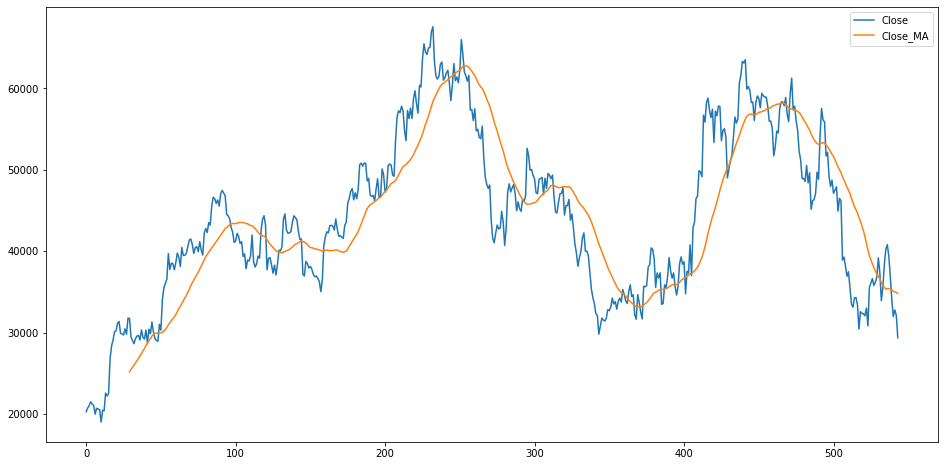

In [53]:
finished_data[['Close','Close_MA']].plot(label='Moving Average', figsize=(16, 8))

In [44]:
#cumulative

finished_data['Close_cumulative_MA'] = finished_data['Close'].expanding().mean().round()

<AxesSubplot:>

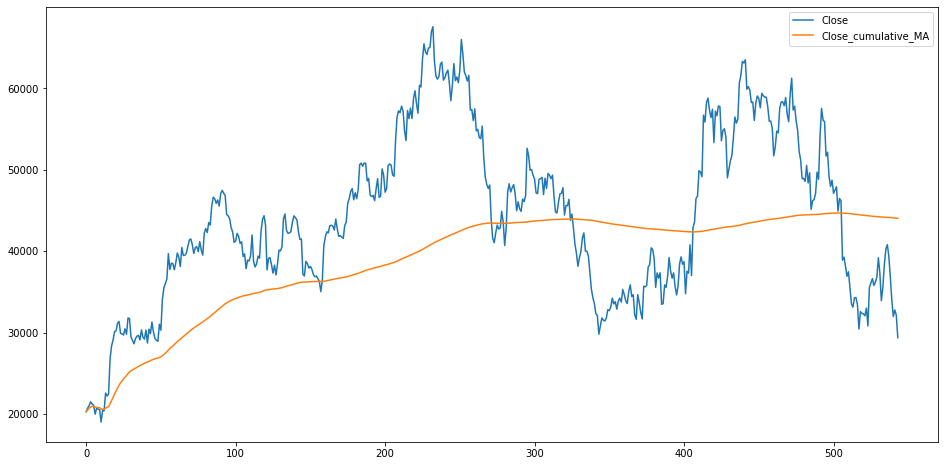

In [46]:
finished_data[['Close','Close_cumulative_MA']].plot(label='Moving Average', figsize=(16, 8))

In [54]:
#exponential

finished_data['Close_exponential_MA'] = finished_data['Close'].ewm(span=30).mean().round()

<AxesSubplot:>

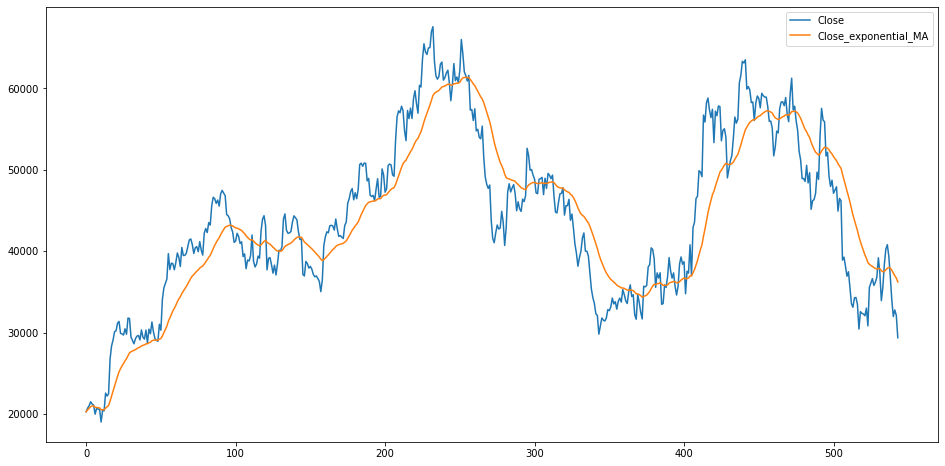

In [56]:
finished_data[['Close','Close_exponential_MA']].plot(label='Moving Average', figsize=(16, 8))

# References that actually work:

    - https://medium.com/crypto-code/how-to-web-scraping-one-full-years-of-any-pricing-history-from-coinmarketcap-135467ae454b
    
    - https://medium.com/crypto-code/learn-the-basics-of-web-scraping-data-with-python-and-beautifulsoup-2222e6dbe117
    
    - https://pbpython.com/pandas-html-table.html#:~:text=The%20pandas%20read_html()%20function,to%20scrape%20the%20site's%20HTML.
    
    Calculating the TVL:
    
    - https://cointelegraph.com/explained/what-is-total-value-locked-tvl-in-crypto-and-why-does-it-matter
    
    - https://www.cnbctv18.com/cryptocurrency/explained--total-value-locked-what-is-it-and-why-does-it-matter-13743222.htm
    
    - https://coinmarketcap.com/alexandria/glossary/volume
    
    - calculate circulating supply:
    https://www.google.com/search?q=how+to+calculate+circulating+supply+crypto&oq=how+to+calculate+Circulating+Supply&aqs=chrome.1.69i57j0i512j0i22i30l3j0i390l3.6064j0j7&sourceid=chrome&ie=UTF-8
    
    - Getting the data:
    https://ycharts.com/indicators/bitcoin_transactions_per_day
    
    - Tableau:
    https://tableau.toanhoang.com/cryptocurrency-dashboard-full-tutorial/
    
    - Fixing errors:
        - https://stackoverflow.com/questions/16233593/how-to-strip-comma-in-python-string
        - https://stackoverflow.com/questions/21381106/how-to-trim-a-series-of-string-objects-in-python
        - https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once
        - https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int
        - https://stackoverflow.com/questions/43677933/converting-object-to-int-pandas
        - https://stackoverflow.com/questions/63367517/how-to-convert-object-to-int-or-float-in-pandas
        - https://stackoverflow.com/questions/49166701/converting-object-to-int-of-a-large-dataframe

    - Moving Average:
        - https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/
        - https://www.alpharithms.com/calculating-moving-averages-in-python-585117/
        - https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/

## To download HTML file:
    
    - Go to Historical data "BTC" > "Load more" to get till 2021-01-01 > Go to inspect > Click on "Elements" >
    Right click so you can compy element > Paste it to text file > Save the text file as "xxxxx.html" > use your charming code to convert the string html into a table > Done!!!

RSK blockchain
downloand a software datastudio or tableau
What's API and how to get a info from API cryptocurrency
coinmarketcap

    - https://www.google.com/search?q=3+Simple+Ways+To+Obtain+Cryptocurrency+Data+In+Python&oq=3+Simple+Ways+To+Obtain+Cryptocurrency+Data+In+Python&aqs=chrome..69i57j69i60l3.390j0j7&sourceid=chrome&ie=UTF-8

References:
    
    https://www.google.com/search?q=how+to+download+historical+data+from+coinmarketcap&oq=how+to+download+historical+data+from+&aqs=chrome.1.0i512j0i20i263i512j0i512j69i57j0i512l6.11030j0j7&sourceid=chrome&ie=UTF-8
    
    https://medium.com/coinmonks/downloading-historical-data-from-coinmarketcap-41a2b0111baf
    
    https://academy.bit2me.com/en/que-es-rootstock-rsk/#:~:text=The%20RSK%20platform%20is%20a,assist%20RSK%20in%20its%20execution.
    
IOVLabs:

    https://www.iovlabs.org/press/defi-on-bitcoin-soars-as-rsk-total-value-locked-crosses-1-445-k-btc-driven-by-sovryn-launch.html
    
    https://www.iovlabs.org/press.html
    
    https://www.iovlabs.org/press/rsk-plataform-becomes-the-most-secure-smart-contract-platform-in-the-world.html
    
    https://www.iovlabs.org/press/microsoft-azure-adds-rsk-smart-contracts-to-its-cloud-offering.html
    
    https://www.iovlabs.org/press/iovlabs-brings-rsk-technology-to-30-million-users-social-network-by-acquiring-taringa.html
    
    https://www.iovlabs.org/press/bitcoin-s-first-smart-contract-platform-rsk-connects-with-japan-s-biggest-blockchain-accelerator-binarystar.html
    